In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

import seaborn as sns

In [2]:
data_folder = Path('./data')
classes = list(data_folder.iterdir())
classes

[PosixPath('data/running'),
 PosixPath('data/stairs'),
 PosixPath('data/walking'),
 PosixPath('data/idle')]

In [65]:
dfs = []
def flatten_sensor_frame(df): return df.values.flatten()
data_list = []
for class_folder in classes:
    for file in class_folder.iterdir():
        df = pd.read_csv(file)

        frame = flatten_sensor_frame(df)
        record = list((frame)) + [str(class_folder)]
        data_list.append(record)
        
        df['label'] = class_folder
        dfs.append(df)

    
cols = [str(i) for i in range(90)] + ['label']
full_df = pd.DataFrame(data=data_list, columns=cols)

In [66]:
dfs[0].head()

,accelerometer_X,accelerometer_Y,accelerometer_Z,label
0,2.667141,-7.838616,-9.548077,data/running
1,4.017470,8.705317,-2.226607,data/running
2,22.357056,20.887016,-2.820370,data/running
3,17.922995,10.156203,2.523489,data/running
4,-2.164358,9.524135,-0.847547,data/running


In [27]:
full_df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,label
0,2.667141,-7.838616,-9.548077,4.017470,8.705317,-2.226607,22.357056,20.887016,-2.820370,17.922995,...,-0.885855,11.310209,-8.939949,13.771448,9.825804,1.470040,-2.044648,6.689400,10.807426,data/running
1,10.745177,23.415293,1.144428,3.744532,-9.035717,-2.892196,0.766145,21.092916,-0.928950,23.956383,...,1.532289,15.782578,1.699883,14.168885,32.245110,3.390190,3.983952,-1.867477,-1.407790,data/running
2,22.031445,18.406622,1.537078,3.600880,12.368446,2.217031,-0.354342,-13.206416,-7.254431,8.245631,...,4.151546,24.502260,-1.139640,-0.493206,-14.542381,-2.164358,2.442086,9.677363,-3.016694,data/running
3,10.371682,-1.608903,-2.801216,25.718515,16.247053,-6.488286,-3.600879,6.684612,-2.375048,10.534488,...,17.056293,37.330395,5.621586,2.695871,11.626244,-1.082179,8.681376,12.124237,-4.946420,data/running
4,3.624822,9.059659,4.390966,33.073500,33.202790,4.802769,3.792416,3.596091,-2.681506,-1.872266,...,1.187524,13.072341,-1.953669,1.441310,-14.585477,3.610456,6.028600,17.889475,-0.732626,data/running


In [5]:
full_df.shape

(6462, 91)

In [6]:
counts = full_df['label'].value_counts()


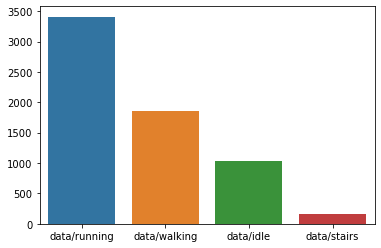

In [7]:
sns.barplot(x=counts.index, y=counts.values)

In [29]:
data = np.array(dfs)

In [71]:
x_acc_cols = [str(i) for i in range(0,89,3)]
y_acc_cols = [str(i) for i in range(1,89,3)]
z_acc_cols = [str(i) for i in range(2,90,3)]


In [72]:
full_df.iloc[0][x_acc_cols].values.shape

(30,)

In [73]:
from matplotlib import pyplot as plt

In [74]:
activity_data[z_acc_cols].mean(axis=0).shape

(30,)

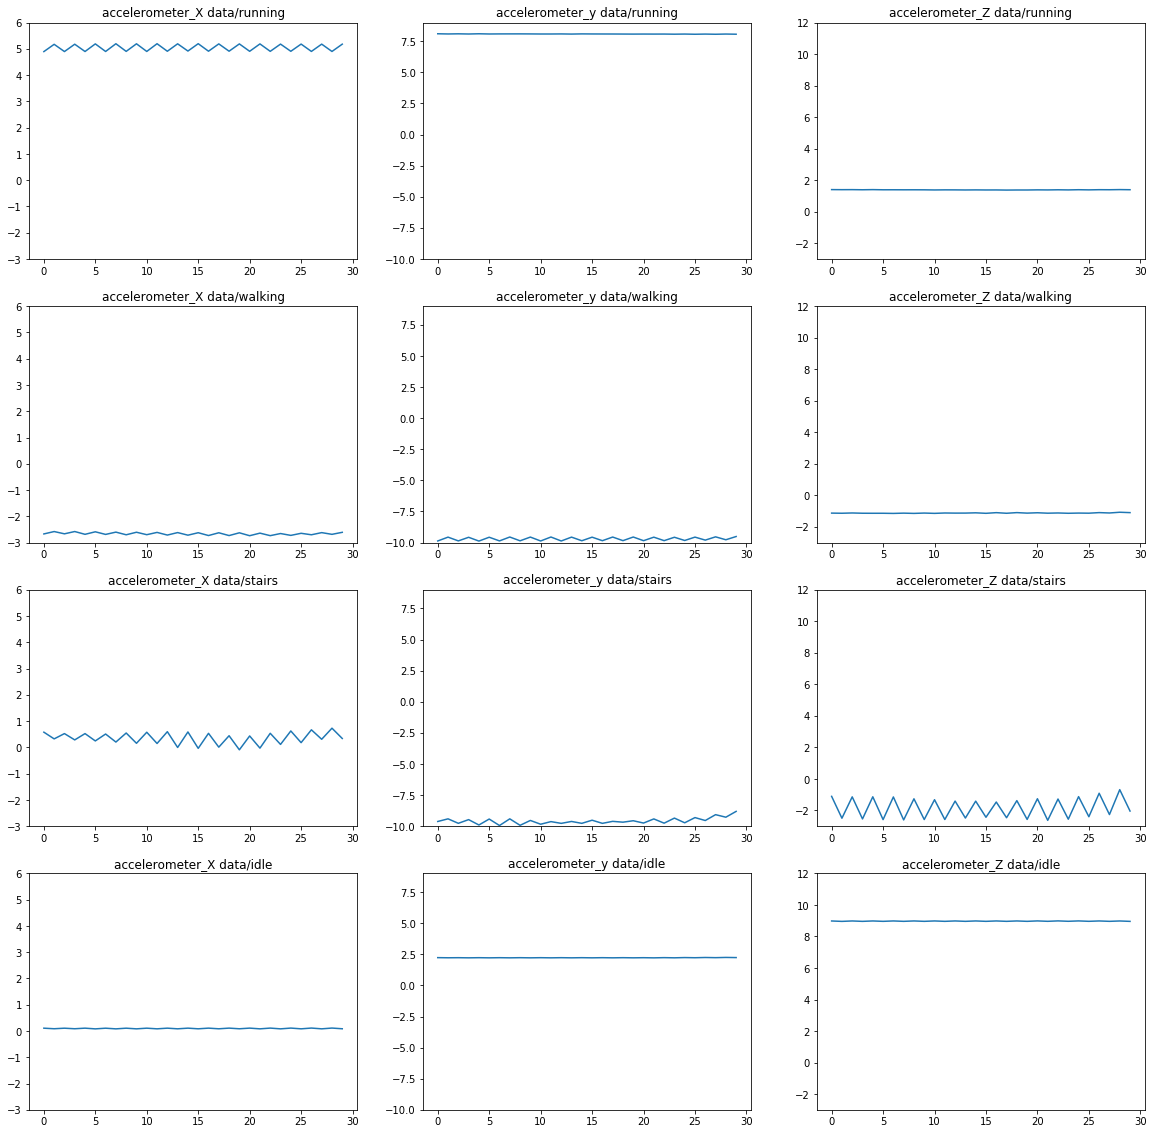

In [82]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))

class_labels = ['data/running', 'data/walking', 'data/stairs', 'data/idle']
steps = np.arange(30)
for ax_row, class_label in zip(axes, class_labels):
    activity_data = full_df[full_df.label == class_label]
    x_freq = activity_data[x_acc_cols].mean(axis=0)
    ax_row[0].plot(steps, x_freq, )
    ax_row[0].set_title(f'accelerometer_X {class_label}')
    
    ax_row[0].set_ylim(-3, 6)
    
    y_freq = activity_data[y_acc_cols].mean(axis=0)
    ax_row[1].plot(steps, y_freq, )
    ax_row[1].set_title(f'accelerometer_y {class_label}')
    ax_row[1].set_ylim(-10, 9)
    
    z_freq = activity_data[z_acc_cols].mean(axis=0)
    ax_row[2].plot(steps, z_freq, )
    ax_row[2].set_title(f'accelerometer_Z {class_label}')
    ax_row[2].set_ylim(-3, 12)
    
    

Text(0.5, 1.0, 'f')

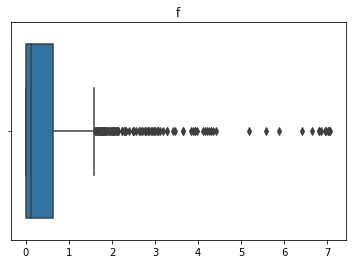

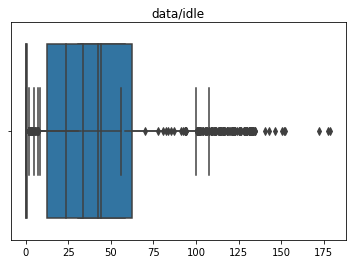

In [109]:
for class_label in class_labels:
    activity_data = full_df[full_df.label == class_label]
    
    z_freq_var = activity_data[z_acc_cols].var(axis=1)
    full_df.loc[activity_data.index, 'z_var'] = z_freq_var

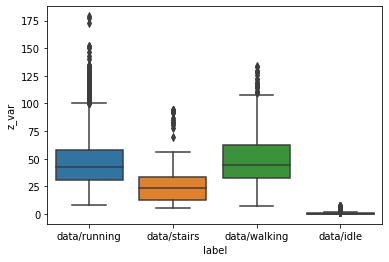

In [112]:
sns.boxplot(x='label', y='z_var',data=full_df)

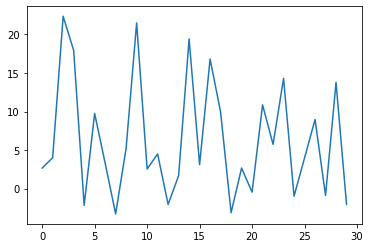

In [113]:
plt.plot(list(range(30)), full_df.iloc[0][x_acc_cols].values)

In [114]:
from sklearn.model_selection import StratifiedKFold

In [115]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [116]:
label2num = dict(enumerate(full_df['label'].unique()))
num2label = {n:i for i,n in label2num.items()}

In [168]:
X = full_df[[str(i) for i in range(90)] ]
y = full_df['label'].map(num2label)

# SVM

In [169]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [170]:
from sklearn import svm

In [171]:
accuracies = []

for train_ix, valid_ix in kfold.split(X, y):
    # select rows
    X_train, X_valid = X.loc[train_ix], X.loc[valid_ix]
    y_train, y_valid = y.loc[train_ix], y.loc[valid_ix]
    
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    
    acc = accuracy_score(y_pred, y_valid)
    accuracies.append(acc)
    print(acc)
    print(confusion_matrix(y_valid, y_pred))
    
print(f'Mean accuracy = {round(np.mean(accuracies), 5)}')   

0.9822119102861562
[[681   0   0   1]
 [  0  12  21   0]
 [  0   1 369   0]
 [  0   0   0 208]]
0.9845320959010054
[[682   0   0   0]
 [  0  13  20   0]
 [  0   0 370   0]
 [  0   0   0 208]]
0.9814241486068112
[[682   0   0   0]
 [  0   9  24   0]
 [  0   0 370   0]
 [  0   0   0 207]]
0.9814241486068112
[[680   0   0   1]
 [  0  14  19   0]
 [  0   4 366   0]
 [  0   0   0 208]]
0.9814241486068112
[[681   0   0   0]
 [  0  10  23   0]
 [  0   1 369   0]
 [  0   0   0 208]]
Mean accuracy = 0.9822


# SVM with z_var feature

In [118]:
X = full_df[[str(i) for i in range(90)] + ['z_var'] ]
y = full_df['label'].map(num2label)

In [119]:
for train_ix, valid_ix in kfold.split(X, y):
    # select rows
    X_train, X_valid = X.loc[train_ix], X.loc[valid_ix]
    y_train, y_valid = y.loc[train_ix], y.loc[valid_ix]
    
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    
    acc = accuracy_score(y_pred, y_valid)
    print(acc)
    print(confusion_matrix(y_valid, y_pred))

0.979891724671307
[[682   0   0   0]
 [  0   8  25   0]
 [  0   1 369   0]
 [  0   0   0 208]]
0.9837587006960556
[[682   0   0   0]
 [  0  12  21   0]
 [  0   0 370   0]
 [  0   0   0 208]]
0.9791021671826625
[[682   0   0   0]
 [  0   7  26   0]
 [  0   1 369   0]
 [  0   0   0 207]]
0.9806501547987616
[[681   0   0   0]
 [  0  12  21   0]
 [  0   4 366   0]
 [  0   0   0 208]]
0.978328173374613
[[681   0   0   0]
 [  0   6  27   0]
 [  0   1 369   0]
 [  0   0   0 208]]


# find_peaks

In [125]:
from scipy.signal import find_peaks

In [132]:

for i in np.random.randint(len(X), size=10):
    print(find_peaks(X.iloc[i][z_acc_cols]))

(array([ 1,  4,  7,  9, 14, 16, 19, 21, 24, 26, 28]), {})
(array([ 1,  5,  8, 12, 14, 16, 19, 21, 23, 26]), {})
(array([ 2,  4,  6,  9, 12, 15, 18, 21, 25, 27]), {})
(array([ 2,  5,  7,  9, 12, 15, 17, 20, 23, 26, 28]), {})
(array([ 2,  6,  8, 11, 13, 16, 19, 23, 25, 28]), {})
(array([ 1,  3,  6,  8, 10, 12, 15, 17, 21, 23, 25, 28]), {})
(array([ 2,  4,  7, 10, 12, 14, 17, 20, 23, 25, 28]), {})
(array([ 2,  5,  8, 12, 15, 17, 19, 22, 24, 26, 28]), {})
(array([ 7, 10, 14, 16, 18, 22, 25]), {})
(array([ 1,  6, 10, 15, 18, 20, 22, 26]), {})


In [143]:
a = np.array([ 1,  4,  7,  9, 14, 16, 19, 21, 24, 26, 28])

array([0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.])

In [150]:
def encode_one_hot_peaks(a, max_size=30):
    b = np.zeros(max_size)
    b[a] = 1
    return b

In [152]:
peaks, _ = find_peaks(activity_data.loc[ix][z_acc_cols])
peaks

array([ 2,  5,  9, 13, 17, 21, 27])

In [162]:
z_peaks_cols = [f'is_z_peak_at_{i}' for i in range(30)]
y_peaks_cols = [f'is_y_peak_at_{i}' for i in range(30)]
x_peaks_cols = [f'is_x_peak_at_{i}' for i in range(30)]
for col in z_peaks_cols:
    full_df[col] = 0
    
for col in y_peaks_cols:
    full_df[col] = 0
    
for col in x_peaks_cols:
    full_df[col] = 0

In [161]:
full_df.loc[ix, z_peaks_cols] = peaks_one_hot

In [164]:
for class_label in class_labels:
    activity_data = full_df[full_df.label == class_label]
    
    for ix in activity_data.index:
        z_peaks, _ = find_peaks(activity_data.loc[ix][z_acc_cols])
        z_peaks_one_hot = encode_one_hot_peaks(z_peaks)
        full_df.loc[ix, z_peaks_cols] = z_peaks_one_hot
        
        y_peaks, _ = find_peaks(activity_data.loc[ix][y_acc_cols])
        y_peaks_one_hot = encode_one_hot_peaks(y_peaks)
        full_df.loc[ix, y_peaks_cols] = y_peaks_one_hot
        
        x_peaks, _ = find_peaks(activity_data.loc[ix][x_acc_cols])
        x_peaks_one_hot = encode_one_hot_peaks(x_peaks)
        full_df.loc[ix, y_peaks_cols] = x_peaks_one_hot


In [173]:
X = full_df[[str(i) for i in range(90)] + z_peaks_cols + y_peaks_cols + x_peaks_cols ]
y = full_df['label'].map(num2label)

In [174]:
accuracies = []

for train_ix, valid_ix in kfold.split(X, y):
    # select rows
    X_train, X_valid = X.loc[train_ix], X.loc[valid_ix]
    y_train, y_valid = y.loc[train_ix], y.loc[valid_ix]
    
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    
    acc = accuracy_score(y_pred, y_valid)
    accuracies.append(acc)
    print(acc)
    print(confusion_matrix(y_valid, y_pred))
    
print(f'Mean accuracy = {round(np.mean(accuracies), 5)}')    

0.9822119102861562
[[681   0   0   1]
 [  0  12  21   0]
 [  0   1 369   0]
 [  0   0   0 208]]
0.9845320959010054
[[682   0   0   0]
 [  0  13  20   0]
 [  0   0 370   0]
 [  0   0   0 208]]
0.9814241486068112
[[682   0   0   0]
 [  0   9  24   0]
 [  0   0 370   0]
 [  0   0   0 207]]
0.9814241486068112
[[680   0   0   1]
 [  0  14  19   0]
 [  0   4 366   0]
 [  0   0   0 208]]
0.9806501547987616
[[681   0   0   0]
 [  0   9  24   0]
 [  0   1 369   0]
 [  0   0   0 208]]
Mean accuracy = 0.98205


In [175]:
X

,0,1,2,3,4,5,6,7,8,9,...,is_x_peak_at_20,is_x_peak_at_21,is_x_peak_at_22,is_x_peak_at_23,is_x_peak_at_24,is_x_peak_at_25,is_x_peak_at_26,is_x_peak_at_27,is_x_peak_at_28,is_x_peak_at_29
0,2.667141,-7.838616,-9.548077,4.017470,8.705317,-2.226607,22.357056,20.887016,-2.820370,17.922995,...,0,0,0,0,0,0,0,0,0,0
1,10.745177,23.415293,1.144428,3.744532,-9.035717,-2.892196,0.766145,21.092916,-0.928950,23.956383,...,0,0,0,0,0,0,0,0,0,0
2,22.031445,18.406622,1.537078,3.600880,12.368446,2.217031,-0.354342,-13.206416,-7.254431,8.245631,...,0,0,0,0,0,0,0,0,0,0
3,10.371682,-1.608903,-2.801216,25.718515,16.247053,-6.488286,-3.600879,6.684612,-2.375048,10.534488,...,0,0,0,0,0,0,0,0,0,0
4,3.624822,9.059659,4.390966,33.073500,33.202790,4.802769,3.792416,3.596091,-2.681506,-1.872266,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,0.215478,0.090980,9.734824,0.234632,-0.095768,9.715671,0.239420,-0.009577,9.763555,0.239420,...,0,0,0,0,0,0,0,0,0,0
6458,0.440533,2.360683,9.193734,2.341529,-0.995988,10.515334,-1.728614,-0.387861,10.017340,0.244209,...,0,0,0,0,0,0,0,0,0,0
6459,-1.058237,4.807557,7.824251,-0.866701,4.946421,8.365341,-0.478840,5.152323,8.178593,-0.641646,...,0,0,0,0,0,0,0,0,0,0
6460,-0.114922,-0.105345,9.806650,-0.081403,-0.124498,9.763555,-0.124498,-0.081403,9.840169,-0.081403,...,0,0,0,0,0,0,0,0,0,0


# Weighted SVM

In [20]:
weights = {0:1, 1:100, 2:50, 3:1}


In [21]:
for train_ix, valid_ix in kfold.split(X, y):
    # select rows
    X_train, X_valid = X.loc[train_ix], X.loc[valid_ix]
    y_train, y_valid = y.loc[train_ix], y.loc[valid_ix]
    
    clf = svm.SVC(class_weight=weights)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    
    acc = accuracy_score(y_pred, y_valid)
    print(acc)
    print(confusion_matrix(y_valid, y_pred))

0.982985305491106
[[681   0   0   1]
 [  0  19  14   0]
 [  0   7 363   0]
 [  0   0   0 208]]
0.9876256767208044
[[682   0   0   0]
 [  0  22  11   0]
 [  0   5 365   0]
 [  0   0   0 208]]
0.9845201238390093
[[682   0   0   0]
 [  0  18  15   0]
 [  0   5 365   0]
 [  0   0   0 207]]
0.9791021671826625
[[680   0   0   1]
 [  0  17  16   0]
 [  0  10 360   0]
 [  0   0   0 208]]
0.9829721362229102
[[681   0   0   0]
 [  0  17  16   0]
 [  0   6 364   0]
 [  0   0   0 208]]


# SVM with binary sub-classifier

In [140]:
X_train, X_valid = X.loc[train_ix], X.loc[valid_ix]
y_train, y_valid = y.loc[train_ix], y.loc[valid_ix]

In [141]:
# Setup binary classification problem

In [142]:
stairs_trn_ix = (y_train == 1) | (y_train == 2)

y_train_stairs = y_train[stairs_trn_ix].copy()
X_train_stairs = X_train[stairs_trn_ix]

y_train_grouped = y_train.copy()
y_train_grouped[stairs_trn_ix] = 2

stairs_val_ix = (y_valid == 1) | (y_valid == 2)
y_valid_stairs = y_valid[stairs_val_ix].copy()
X_valid_stairs = X_valid[stairs_val_ix]

y_valid_grouped = y_valid.copy()
y_valid_grouped[stairs_val_ix] = 2

In [143]:
X_train_stairs.shape, X_valid_stairs.shape

((1612, 90), (403, 90))

In [144]:
y_train_stairs.value_counts()

2    1480
1     132
Name: label, dtype: int64

In [145]:
stairs_clf = svm.SVC()
stairs_clf.fit(X_train_stairs, y_train_stairs)


In [147]:
print(confusion_matrix(y_valid_stairs, y_pred_stairs))

[[ 16  17]
 [  2 368]]


In [148]:
clf = svm.SVC()
clf.fit(X_train, y_train_grouped)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [149]:
y_pred_grouped = clf.predict(X_valid)

In [150]:
accuracy_score(y_pred_grouped, y_valid)

0.9744582043343654

In [151]:
confusion_matrix(y_valid, y_pred_grouped)

array([[681,   0,   0,   0],
       [  0,   0,  33,   0],
       [  0,   0, 370,   0],
       [  0,   0,   0, 208]])

In [152]:
group_ix = y_pred_grouped == 2

X_valid_group = X_valid[group_ix]

In [153]:
is_stairs_preds = stairs_clf.predict(X_valid_group)
is_stairs_preds

array([2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [157]:
y_pred_grouped[group_ix] = is_stairs_preds

In [159]:
confusion_matrix(y_valid, y_pred_grouped)

array([[681,   0,   0,   0],
       [  0,  16,  17,   0],
       [  0,   2, 368,   0],
       [  0,   0,   0, 208]])

In [160]:
def predict_valid_labels(X_train, y_train, X_valid):
    stairs_trn_ix = (y_train == 1) | (y_train == 2)

    y_train_stairs = y_train[stairs_trn_ix].copy()
    X_train_stairs = X_train[stairs_trn_ix]

    y_train_grouped = y_train.copy()
    y_train_grouped[stairs_trn_ix] = 2
    
    
    stairs_clf = svm.SVC()
    stairs_clf.fit(X_train_stairs, y_train_stairs)
    
    clf = svm.SVC()
    clf.fit(X_train, y_train_grouped)
    y_pred_grouped = clf.predict(X_valid)
    
    group_ix = y_pred_grouped == 2

    X_valid_group = X_valid[group_ix]
    is_stairs_preds = stairs_clf.predict(X_valid_group)
    y_pred_grouped[group_ix] = is_stairs_preds
    return y_pred_grouped

In [162]:
y_pred_grouped = predict_valid_labels(X_train, y_train, X_valid)
confusion_matrix(y_valid, y_pred_grouped)

array([[681,   0,   0,   0],
       [  0,  16,  17,   0],
       [  0,   2, 368,   0],
       [  0,   0,   0, 208]])

In [163]:
for train_ix, valid_ix in kfold.split(X, y):
    # select rows
    X_train, X_valid = X.loc[train_ix], X.loc[valid_ix]
    y_train, y_valid = y.loc[train_ix], y.loc[valid_ix]
    
    y_pred = predict_valid_labels(X_train, y_train, X_valid)

    
    acc = accuracy_score(y_pred, y_valid)
    print(acc)
    print(confusion_matrix(y_valid, y_pred))

0.9845320959010054
[[681   0   0   1]
 [  0  17  16   0]
 [  0   3 367   0]
 [  0   0   0 208]]
0.9891724671307038
[[682   0   0   0]
 [  0  19  14   0]
 [  0   0 370   0]
 [  0   0   0 208]]
0.9860681114551083
[[682   0   0   0]
 [  0  16  17   0]
 [  0   1 369   0]
 [  0   0   0 207]]
0.9821981424148607
[[680   0   0   1]
 [  0  15  18   0]
 [  0   4 366   0]
 [  0   0   0 208]]
0.9852941176470589
[[681   0   0   0]
 [  0  16  17   0]
 [  0   2 368   0]
 [  0   0   0 208]]
